In [ ]:
import pandas as pd

In [ ]:
df_MI = pd.read_csv(dwn_url)
df_MI = df_MI.drop('Unnamed: 0', axis=1)

In [ ]:
df_MI

,Entropy
0,13.399662
1,13.400227
2,13.399525
3,13.400404
4,13.400180
...,...
275,13.401043
276,13.399691
277,13.399147
278,13.400215


In [ ]:
df_MI['Label']=1

In [ ]:
df_MI

,Entropy,Label
0,13.399662,1
1,13.400227,1
2,13.399525,1
3,13.400404,1
4,13.400180,1
...,...,...
275,13.401043,1
276,13.399691,1
277,13.399147,1
278,13.400215,1


In [ ]:
df_N = pd.read_csv(dwn_url)
df_N = df_N.drop('Unnamed: 0', axis=1)
df_N['Label']=0

In [ ]:
df_N

,Entropy,Label
0,13.400763,0
1,13.399985,0
2,13.400381,0
3,13.400293,0
4,13.400413,0
...,...,...
275,13.400386,0
276,13.400626,0
277,13.400406,0
278,13.400155,0


**PENGGABUNGAN**

In [ ]:
df = pd.concat([df_MI, df_N])
df

,Entropy,Label
0,13.399662,1
1,13.400227,1
2,13.399525,1
3,13.400404,1
4,13.400180,1
...,...,...
275,13.400386,0
276,13.400626,0
277,13.400406,0
278,13.400155,0


**ACAK**

In [ ]:
df = df.sample(560).reset_index(drop=True)
df

,Entropy,Label
0,13.400658,1
1,13.399688,1
2,13.400565,0
3,13.400067,0
4,13.399991,1
...,...,...
555,13.400117,1
556,13.400296,0
557,13.398637,1
558,13.400075,0


NORMALISASI **DATASET**

In [ ]:
def norm(df):
  df = (df - df.min()) / (df.max() - df.min())
  return df

In [ ]:
X = df.drop('Label', axis=1)
y = df.Label

In [ ]:
X = norm(X)
X

,Entropy
0,0.999693
1,0.999205
2,0.999646
3,0.999396
4,0.999358
...,...
555,0.999421
556,0.999511
557,0.998677
558,0.999400


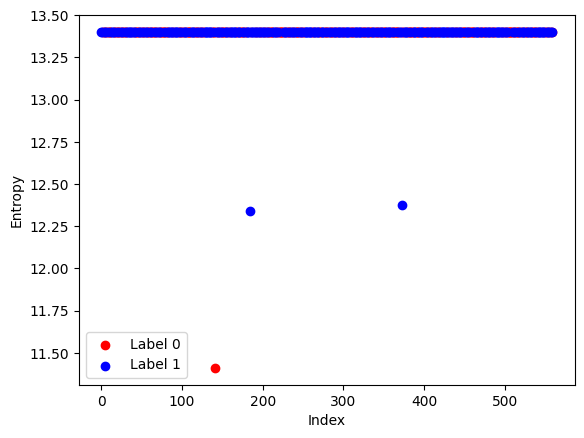

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Memisahkan kolom label 0 dan 1
label_0 = df[df['Label'] == 0]
label_1 = df[df['Label'] == 1]

# Visualisasi penyebaran label 0 dan 1 pada tiap kolom
for column in df.columns:
    if column != 'Label':
        plt.figure()
        plt.scatter(label_0.index, label_0[column], color='red', label='Label 0')
        plt.scatter(label_1.index, label_1[column], color='blue', label='Label 1')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.legend()
        plt.show()

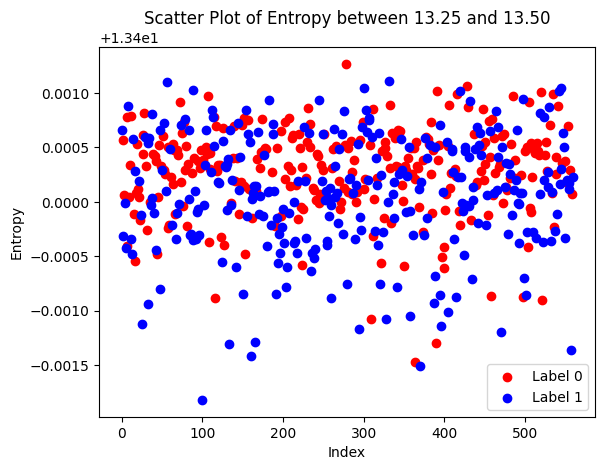

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with columns 'Value' and 'Label'

# Filter the DataFrame based on the desired range
filtered_df = df[(df['Entropy'] >= 13.25) & (df['Entropy'] <= 13.50)]

# Separate the filtered data by labels
label_0 = filtered_df[filtered_df['Label'] == 0]
label_1 = filtered_df[filtered_df['Label'] == 1]

# Create the scatter plot
plt.scatter(label_0.index, label_0['Entropy'], color='red', label='Label 0')
plt.scatter(label_1.index, label_1['Entropy'], color='blue', label='Label 1')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Entropy')
plt.title('Scatter Plot of Entropy between 13.25 and 13.50')

# Add legend
plt.legend()

# Display the plot
plt.show()

**MODEL** **KNN**

In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model KNN dengan perbaikan yang diinginkan
k = 7  # ukuran ketetanggaan
weights = 'uniform'  # menggunakan bobot jarak dalam perhitungan probabilitas
algorithm = 'auto'  # menggunakan struktur data auto
metric = 'manhattan'  # menggunakan fungsi jarak Euclidean

knn = KNeighborsClassifier(n_neighbors=k, weights=weights, algorithm=algorithm, metric=metric)

# Melatih model KNN
knn.fit(X_train_scaled, y_train)

# Memprediksi kelas untuk data uji
y_pred = knn.predict(X_test_scaled)

# Memprediksi probabilitas kelas untuk data uji
y_proba = knn.predict_proba(X_test_scaled)

# Menampilkan hasil prediksi
for i in range(len(X_test)):
    print(f"Data uji: {X_test.iloc[i]}")
    print(f"Prediksi kelas: {y_pred[i]}")
    print(f"Probabilitas kelas: {y_proba[i]}")
    print()

# Menghitung akurasi model
accuracy = knn.score(X_test_scaled, y_test)
print(f"Akurasi model: {accuracy}")

sensitivity = recall_score(y_test, y_pred)
specificity = recall_score(y_test, y_pred, pos_label=0)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Data uji: Entropy    13.400059
Label       1.000000
Name: 453, dtype: float64
Prediksi kelas: 1
Probabilitas kelas: [0. 1.]

Data uji: Entropy    13.399213
Label       1.000000
Name: 341, dtype: float64
Prediksi kelas: 1
Probabilitas kelas: [0. 1.]

Data uji: Entropy    13.40043
Label       1.00000
Name: 177, dtype: float64
Prediksi kelas: 1
Probabilitas kelas: [0. 1.]

Data uji: Entropy    13.399706
Label       1.000000
Name: 86, dtype: float64
Prediksi kelas: 1
Probabilitas kelas: [0. 1.]

Data uji: Entropy    13.400894
Label       0.000000
Name: 332, dtype: float64
Prediksi kelas: 0
Probabilitas kelas: [1. 0.]

Data uji: Entropy    13.40019
Label       0.00000
Name: 140, dtype: float64
Prediksi kelas: 0
Probabilitas kelas: [1. 0.]

Data uji: Entropy    13.399997
Label       0.000000
Name: 272, dtype: float64
Prediksi kelas: 0
Probabilitas kelas: [1. 0.]

Data uji: Entropy    13.400573
Label       0.000000
Name: 296, dtype: float64
Prediksi kelas: 0
Probabilitas kelas: [1. 0.]

Data 